## Loading packages

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn as sns
# sns.set()

from IPython.display import HTML

# from os import listdir
# print(listdir("../input"))

# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("ignore", category=FutureWarning)
# Any results you write to the current directory are saved as output.

## Let's get familiar with the data!

### Training data

The total size of the train data is almost 9 GB and we don't want to wait too long just for a first impression, let's load only some rows: 

In [4]:
train = pd.read_csv("../input/train.csv", nrows=10000000,
                    dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


We can see two columns: Acoustic data and time_to_failure. The further is the seismic singal and the latter corresponds to the time until the laboratory earthquake takes place. Ok, personally I like to rename the columns as typing "acoustic" every time is likely for me to produce errors:

In [5]:
train.rename({"acoustic_data": "signal", "time_to_failure": "quaketime"}, axis="columns", inplace=True)
train.head(5)

,signal,quaketime
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


We can see that the quaketime of these first rows seems to be always the same. But is this really true?

In [6]:
for n in range(5):
    print(train.quaketime.values[n])

1.4690999832
1.4690999821000001
1.4690999809999998
1.4690999799000002
1.4690999787999999


Aha! We can see that they are not the same and that pandas has rounded them off. And we can see that the time seems to decrease. Let's plot the time to get more familiar with this pattern:

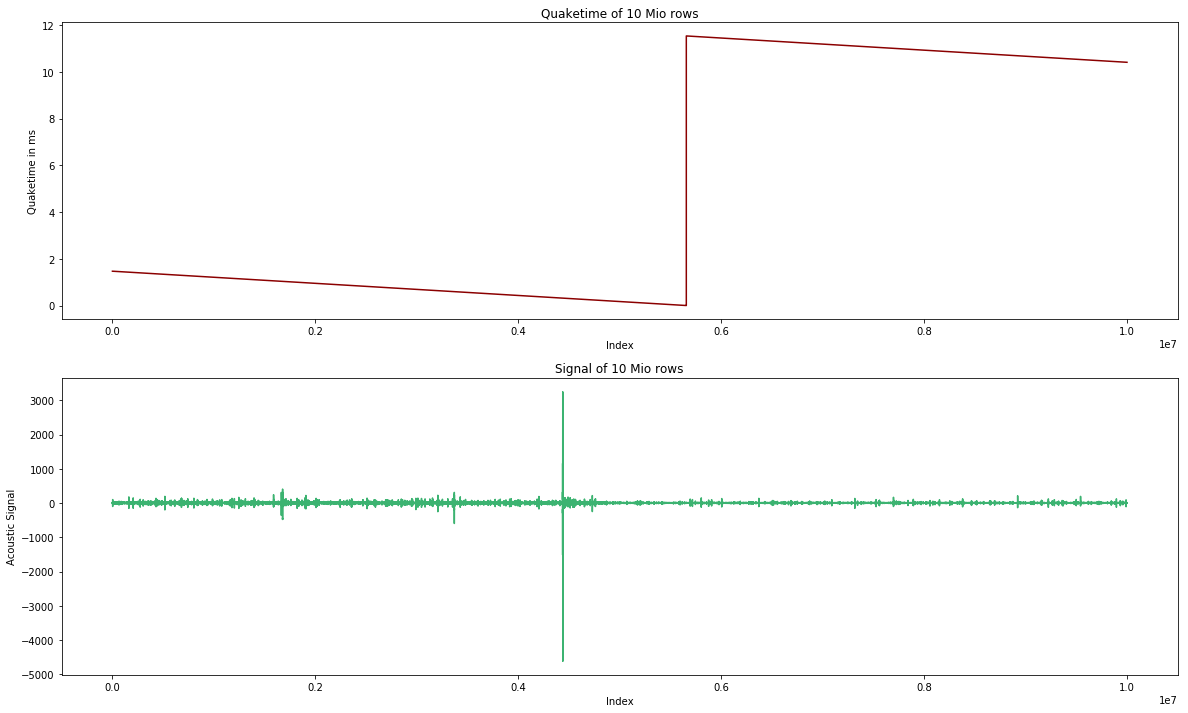

In [7]:
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(train.index.values, train.quaketime.values, c="darkred")
ax[0].set_title("Quaketime of 10 Mio rows")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Quaketime in ms");
ax[1].plot(train.index.values, train.signal.values, c="mediumseagreen")
ax[1].set_title("Signal of 10 Mio rows")
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Acoustic Signal");

### Take-Away

* We can see only one time in 10 Mio rows when quaketime goes to 0. This is a timepoint where an earthquake in the lab occurs. 
* There are many small oscillations until a heavy peak of the signal occurs. Then it takes some time with smaller oscillations and the earthquake occurs.


If we take a look at the first 50000 indizes we can see that there is a second pattern of quaketime that may has something to do with the resolution of the experimental equipment:

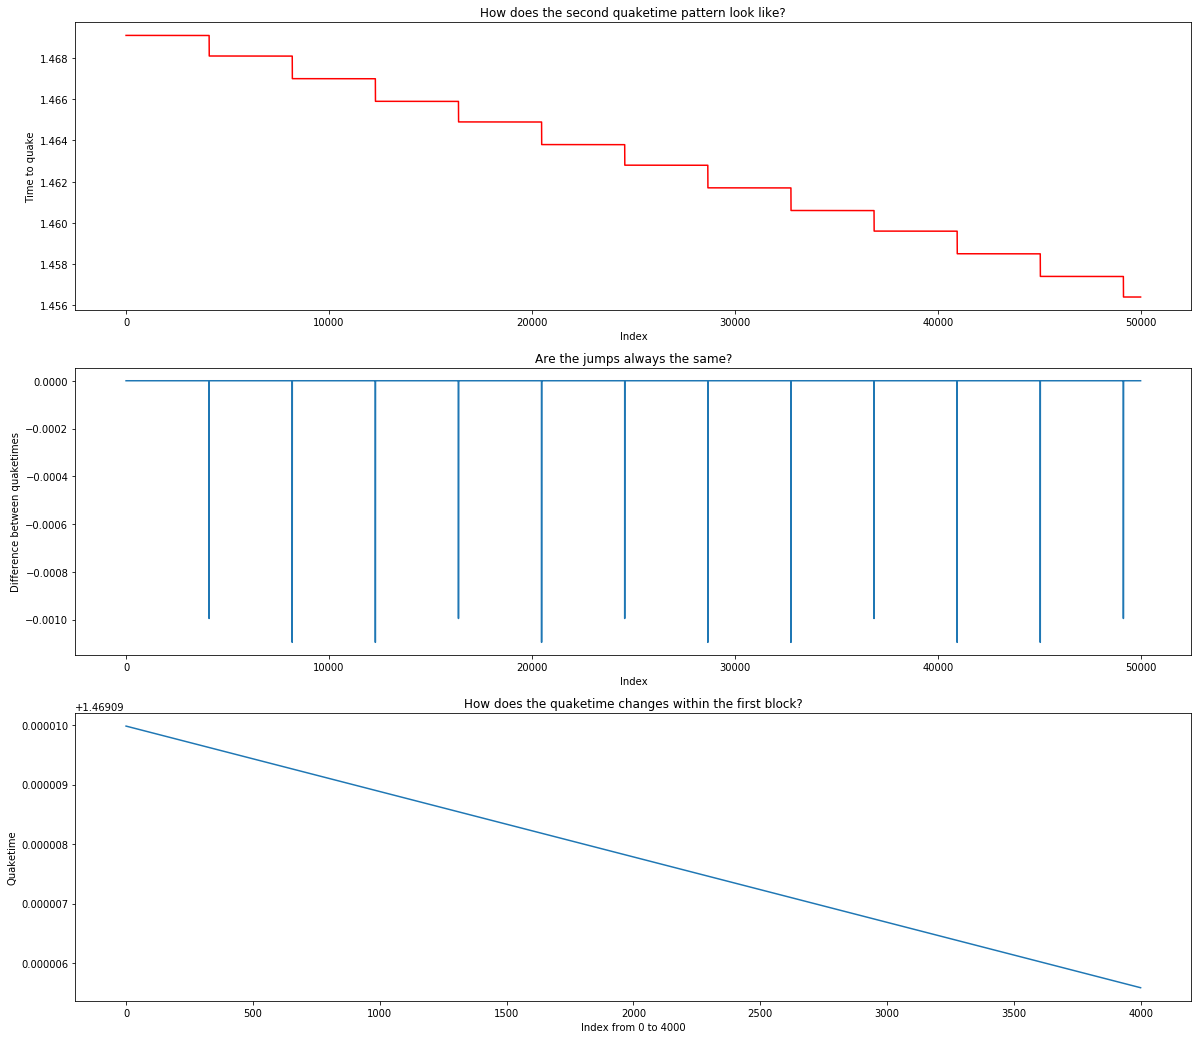

In [8]:
fig, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train.quaketime.values[0:50000], c="Red")
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Time to quake")
ax[0].set_title("How does the second quaketime pattern look like?")
ax[1].plot(train.index.values[0:49999], np.diff(train.quaketime.values[0:50000]))
ax[1].set_xlabel("Index")
ax[1].set_ylabel("Difference between quaketimes")
ax[1].set_title("Are the jumps always the same?")
ax[2].plot(train.index.values[0:4000], train.quaketime.values[0:4000])
ax[2].set_xlabel("Index from 0 to 4000")
ax[2].set_ylabel("Quaketime")
ax[2].set_title("How does the quaketime changes within the first block?");

### Take-Away

Very interesting!

* The first plot shows that the quaketime seems to stay almost constant up to index 4000. Then a steep decrease occurs. Afterwards this kind of pattern is repeated.
* The second plot reveals that the second jump of the quaketime is larger than the first.
* The third plot shows that the quaketime within such a "constant" block is not really constant but linear decreasing even though with very small numbers.

In [12]:
def plot_at_drop_point(drop_point, w=2):
    fig, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(train.index.values[drop_point-w:drop_point+w], train.quaketime.values[drop_point-w:drop_point+w])
    for idx in range(drop_point-w, drop_point):
        print(f'Before drop:\t{train.quaketime.values[idx]}')
    for idx in range(drop_point, drop_point+w):
        print(f'After drop:\t{train.quaketime.values[idx]}')

Before drop:	1.4690954809
Before drop:	1.4690954798
After drop:	1.4680999843
After drop:	1.4680999832


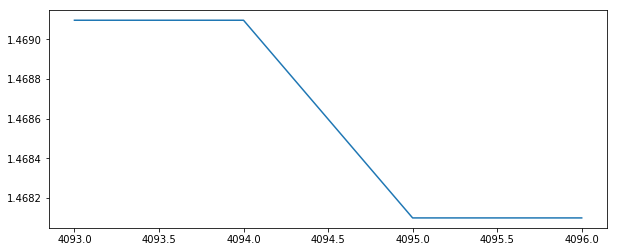

In [14]:
plot_at_drop_point(4095)

Before drop:	1.4680954809
Before drop:	1.4680954797999999
After drop:	1.4669999843000001
After drop:	1.4669999832


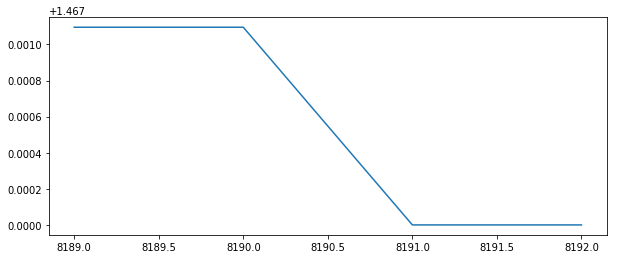

In [18]:
plot_at_drop_point(8191)